In [1]:
#Iloprost had high binding affinity for EP1 and IP receptors (Ki 1.1 and 3.9 nM, respectively), low affinity for FP, EP3 or EP4 receptors, and very low affinity for EP2, DP1 or TP receptors. 

In [2]:
# While Iloprost is an analog of PGI2 that activates PGI2's receptor, the Prostacyclin receptor, to stimulate vasodilation, it has little selectivity in that it binds to and activates all four receptors for prostaglandin E2 viz., Prostaglandin EP1 receptor, Prostaglandin EP2 receptor, Prostaglandin EP3 receptor, and Prostaglandin EP4 receptor.[2] Activation of the EP2 and EP4 receptors cause vasodilation but activation of the EP3 receptor causes vasoconstriction.

In [3]:
import pandas, seaborn

# 0. user-defined variables

In [4]:
expression_file = '/home/adrian/projects/vigur/results/transcriptomics/deseq2/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/vigur/data/transcriptomics/metadata/vigur_metadata_experiment3.tsv'

In [5]:
receptors = {}

receptors['EP1'] = ''
receptors['IP'] = 'ENSG00000160013'



receptors['DP1'] = 'ENSG00000168229'
receptors['DP2'] = 'ENSG00000183134'


receptors['EP1'] = 'ENSG00000160951'
receptors['EP2'] = 'ENSG00000125384'
receptors['EP3'] = 'ENSG00000050628'
receptors['EP4'] = 'ENSG00000171522'

receptors['FP'] = 'ENSG00000122420'
receptors['IP'] = 'ENSG00000160013'
receptors['TP'] = 'ENSG00000006638'

# 1. read data

In [6]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
print(expression.shape)
expression.head()

(61881, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000000003,38.526890,35.309339,39.840736,41.951376,38.061629,38.565773,38.346359,43.985521,43.715238,32.005577,...,35.204046,36.511499,29.939159,31.072017,40.662226,36.395800,24.905552,35.040346,30.920235,37.974110
ENSG00000000005,0.000000,0.000000,0.000000,0.278312,0.000000,0.000000,0.000000,0.000000,0.458944,0.075399,...,0.000000,0.000000,0.177716,0.059379,0.000000,0.000000,0.000000,0.116122,0.015197,0.000000
ENSG00000000419,69.415227,49.131680,66.184838,92.956950,88.650591,85.447069,127.356106,157.183636,150.956365,118.875515,...,113.265541,106.959497,99.429725,85.549739,102.582479,100.516519,84.135830,95.060423,96.772840,107.100754
ENSG00000000457,3.331287,2.858376,3.504064,5.829721,5.274378,4.404222,3.822031,5.466647,6.620200,4.851150,...,3.444193,3.965564,3.876106,3.360422,4.843100,4.291843,2.957526,4.852541,3.489343,3.486497
ENSG00000000460,2.744336,3.172060,3.679316,4.587781,3.403177,3.809046,3.916106,4.543919,3.736573,2.749359,...,3.024118,3.693697,2.545423,2.743481,3.342448,3.326444,3.072015,3.377629,2.217106,3.247478


In [7]:
metadata = pandas.read_csv(metadata_file, sep='\t')
print(metadata.shape)
metadata

(27, 4)


,sample,time,treatment,replicate
0,RSS_HLMV_28,zero,zero,A
1,RSS_HLMV_29,zero,zero,B
2,RSS_HLMV_30,zero,zero,C
3,RSS_HLMV_31,four,zero,A
4,RSS_HLMV_32,four,zero,B
5,RSS_HLMV_33,four,zero,C
6,RSS_HLMV_34,four,half,A
7,NaN,NaN,NaN,NaN
8,RSS_HLMV_36,four,half,C
9,RSS_HLMV_37,four,five,A


In [8]:
# 2. analysis

In [9]:
# 2.1. face-value heatmap

In [10]:
ensembl_IDs = [receptors[element] for element in receptors]
ensembl_IDs

gene_IDs = [element for element in receptors]
gene_IDs

reverse_names = {}
for i in range(len(ensembl_IDs)):
    reverse_names[ensembl_IDs[i]] = gene_IDs[i]
print(reverse_names)

{'ENSG00000160951': 'EP1', 'ENSG00000160013': 'IP', 'ENSG00000168229': 'DP1', 'ENSG00000183134': 'DP2', 'ENSG00000125384': 'EP2', 'ENSG00000050628': 'EP3', 'ENSG00000171522': 'EP4', 'ENSG00000122420': 'FP', 'ENSG00000006638': 'TP'}


In [11]:
RE = expression.loc[ensembl_IDs, ]
print(RE.shape)
RE.head()

(9, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000160951,0.207309,0.074879,0.164731,0.189714,0.166165,0.192825,0.174602,0.058757,0.071626,0.071793,...,0.106939,0.023726,0.259624,0.236463,0.244246,0.055746,0.288137,0.289336,0.536569,0.396921
ENSG00000160013,4.388654,5.230958,3.326597,2.279721,2.145129,3.042765,1.431264,2.112463,2.089937,1.593279,...,4.110138,3.424586,3.833487,4.813520,3.960884,3.929325,6.496970,4.232707,5.587842,5.245472
ENSG00000168229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000183134,0.045891,0.013798,0.074160,0.024583,0.011428,0.068552,0.068322,0.007520,0.023419,0.055804,...,0.048306,0.051757,0.019050,0.064341,0.049787,0.042635,0.052299,0.015887,0.058252,0.061280
ENSG00000125384,0.012857,0.029571,0.093947,0.000000,0.200616,0.240673,0.042122,0.036034,0.185445,0.095769,...,0.030128,0.000000,0.000000,0.003651,0.037632,0.029063,0.725853,0.002714,0.015844,0.000000


In [12]:
sub_samples = metadata[metadata['time'] == 'zero']['sample']
print(sub_samples)
average = RE[sub_samples].mean(axis=1)
average.head()

TPM = pandas.DataFrame(average)
TPM.rename(columns={0:'T0_zero'}, inplace=True)

sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_zero'] = average

sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_half'] = average


sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_five'] = average

sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_fifty'] = average

sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_zero'] = average

sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_half'] = average

sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_five'] = average

sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_fifty'] = average


0    RSS_HLMV_28
1    RSS_HLMV_29
2    RSS_HLMV_30
Name: sample, dtype: object
        sample  time treatment replicate
3  RSS_HLMV_31  four      zero         A
4  RSS_HLMV_32  four      zero         B
5  RSS_HLMV_33  four      zero         C
        sample  time treatment replicate
6  RSS_HLMV_34  four      half         A
8  RSS_HLMV_36  four      half         C
         sample  time treatment replicate
9   RSS_HLMV_37  four      five         A
10  RSS_HLMV_38  four      five         B
11  RSS_HLMV_39  four      five         C
         sample  time treatment replicate
13  RSS_HLMV_41  four     fifty         B
14  RSS_HLMV_42  four     fifty         C
         sample        time treatment replicate
15  RSS_HLMV_43  twentyfour      zero         A
16  RSS_HLMV_44  twentyfour      zero         B
17  RSS_HLMV_45  twentyfour      zero         C
         sample        time treatment replicate
18  RSS_HLMV_46  twentyfour      half         A
19  RSS_HLMV_47  twentyfour      half         B
20  

In [13]:
TPM.rename(reverse_names, axis='index', inplace=True)
TPM

,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five,T24_fifty
EP1,0.148973,0.182901,0.116680,0.066043,0.093553,0.120652,0.173271,0.196043,0.407609
IP,4.315403,2.489205,1.771864,1.945704,1.631329,3.564809,4.023864,4.795726,5.022007
DP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP2,0.044616,0.034855,0.037921,0.071824,0.036090,0.037529,0.045050,0.048240,0.045140
EP2,0.045458,0.147096,0.039078,0.262697,0.239436,0.035195,0.001217,0.264183,0.006186
EP3,0.018646,0.064395,0.024854,0.070630,0.017907,0.043365,0.025889,0.056745,0.052505
EP4,3.945628,7.065001,5.996701,6.852900,8.999669,8.060594,7.631000,7.537718,7.853842
FP,1.684139,2.680481,1.722472,2.244441,2.033796,2.645652,2.100771,2.384072,2.076285
TP,3.372592,4.159909,2.781234,2.211207,2.654461,2.546038,3.015562,3.678968,3.302142


# 3. generate figure

<AxesSubplot:>

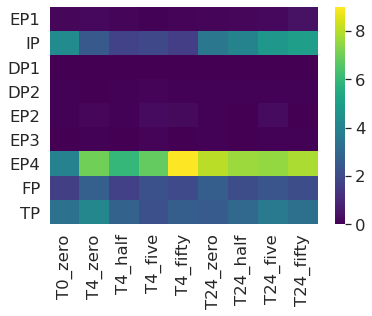

In [14]:
seaborn.set(font_scale=1.5)

seaborn.heatmap(TPM, cmap='viridis')

In [ ]:
#plot trajectories as box plots

In [19]:
import matplotlib

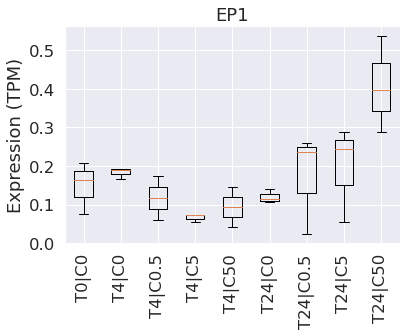

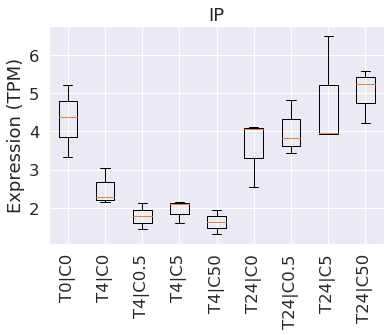

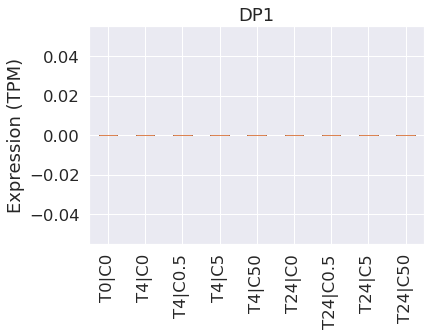

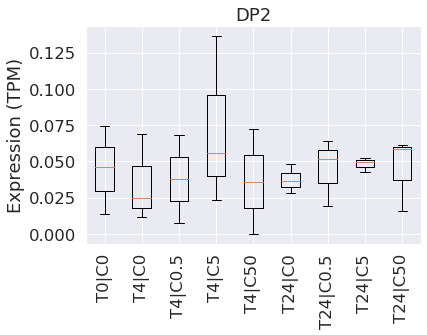

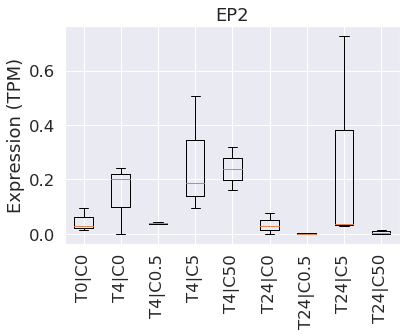

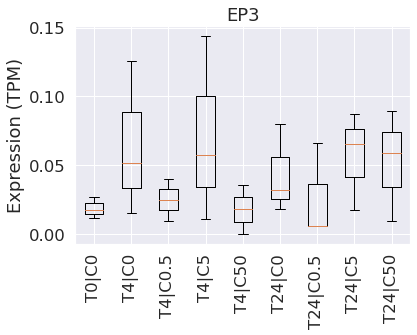

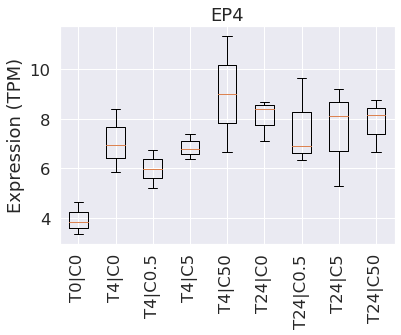

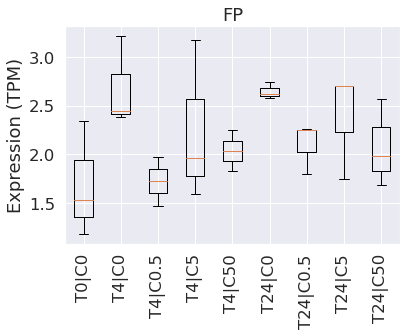

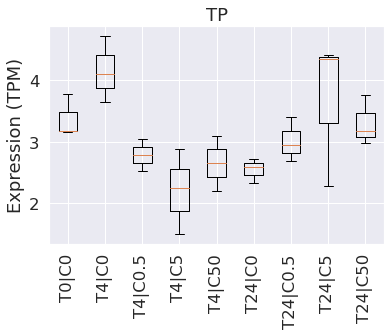

In [45]:
for ensembl in ensembl_IDs:
    
    traj = []
    
    sub_samples = metadata[(metadata['time'] == 'zero') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'half')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'five')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'fifty')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    

    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'half')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'five')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'fifty')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    
    matplotlib.pyplot.boxplot(traj)
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['T0|C0', 'T4|C0', 'T4|C0.5', 'T4|C5', 'T4|C50', 'T24|C0', 'T24|C0.5', 'T24|C5', 'T24|C50'], rotation=90)
    matplotlib.pyplot.ylabel('Expression (TPM)')
    matplotlib.pyplot.title(reverse_names[ensembl])
    matplotlib.pyplot.show()